<a href="https://colab.research.google.com/github/ParasNandwani/MLmodels/blob/master/LineraRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression


## 1.Problem Statement
Sales (in thousannds units) for a product as a function of advertising budgets(in thousands of dollars) for T.V,Radio and NewsPaper media.As a data scientiest we are asked to suggest:
- We want to find a function that given input budgets of T.V,News Paper and radio predicts the output sale.
- which media contributes sales ?
- Visualize the relationship between the features and response using scatter plots


## 2. Data Loading and Description
The advertisng dataset captures sales revenue generated with respect to advertisement spends across mutliple channel like radio,tav and news paper
- TV- Spneds on TV avdertisements
- Radio- Spends on radio advertisements
- Newspaper- Spends on newspaper advertisements
- sales-Sales revenuse generated

### Importing packages

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics

import numpy as np
#  allow plots to directly appears in notebook
%matplotlib inline

### Importing the data sets

In [0]:
data= pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/CaseStudy/Advertising.csv',index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


What are the features ?
- TV. advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio : advertising dollars spent on Radio
- NewsPaper: advertising dollars spent on Newspaper
What is Response?
- Sales :sales of single product in market(in thousands of widget)




## 3. Exploratory Data Analysis


In [0]:
# Tells the shape of data from (rows * columns)
data.shape

(200, 4)

In [0]:
# Tells the dataframe dimensions
data.ndim

2

In [0]:
# gives the basic info about dataframe i.e no. of records columns data type and memory usage
data.info()
# this data shows all the four columns are float type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [0]:
# Gives the basic statictical information about the data frame
data.describe().T
# count :-no of enteries in column
# mean :-mean value of the particular columns series
# std (standard deviation):- how much its deviating from center 
# min :- minimum or minimal value in columns
# 25% 50% 75% :- data lies in quarters
# radio 
#  0% ------25%------50%------75%---------100%
#  0.       9.97     22.90.   36.52.      49.   Radio
#. 0.7      74.37.   149.75   218.82      2

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


**Distribution of features**

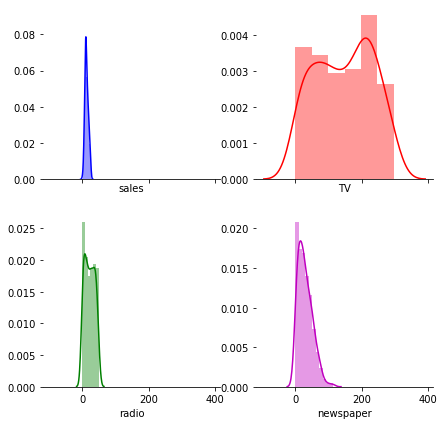

In [0]:
f,axes=plt.subplots(2,2,figsize=(7,7),sharex=True)
sns.despine(left=True)#removes top,left,righyt lines
sns.distplot(data.sales ,ax=axes[0,0] ,color="b")
sns.distplot(data.TV ,ax=axes[0,1] ,color="r")
sns.distplot(data.radio ,ax=axes[1,0] ,color="g")
sns.distplot(data.newspaper ,ax=axes[1,1] ,color="m") 

**Observation**.  
Sales seems to be normaly distribution.Spending on newspaper advertisement is seems to be right skewed .Most of the spends on the newspaper is fairly low where are spend on radio and tv seems be uniform distribution . Spending on TV is higher then spend on radio and news paper


#### Is there a relationship between sales and spend various advertising channels.?


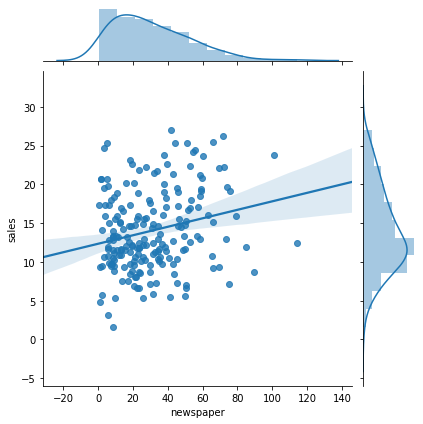

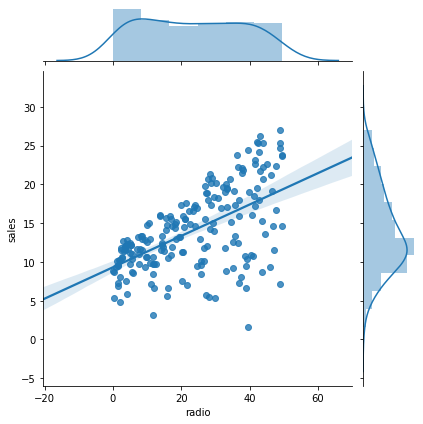

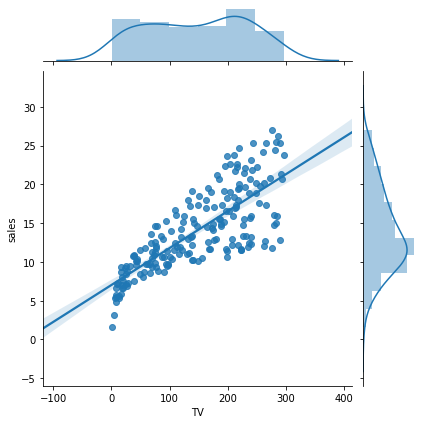

In [0]:
JG1=sns.jointplot("newspaper","sales",data=data,kind="reg")
JG2=sns.jointplot("radio","sales",data=data,kind="reg")
JG3=sns.jointplot("TV","sales",data=data,kind="reg")

**Observation**.  
Sales on news and spend on news paper is not highly correlated as where are sales and spend on TV is highly corelated .



### Visualise Pairwise Correlation


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


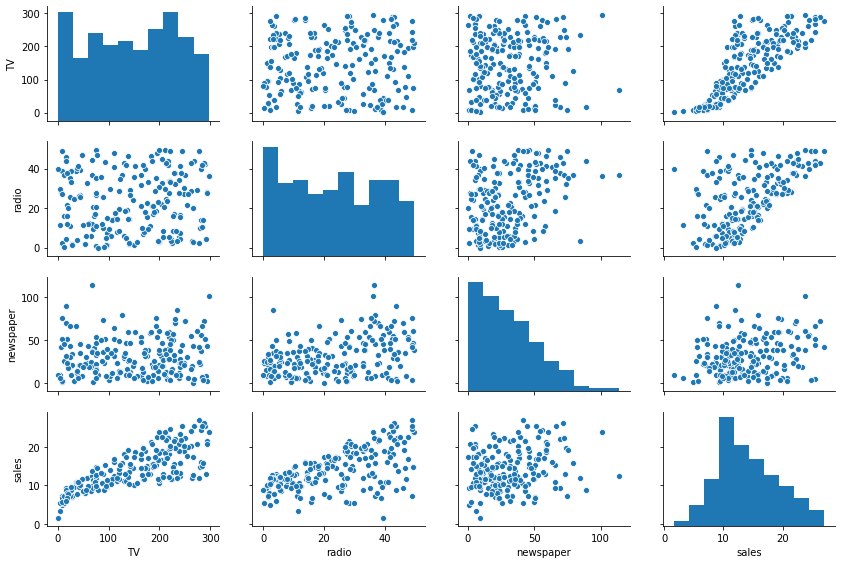

In [0]:
sns.pairplot(data,size=2,aspect=1.5)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


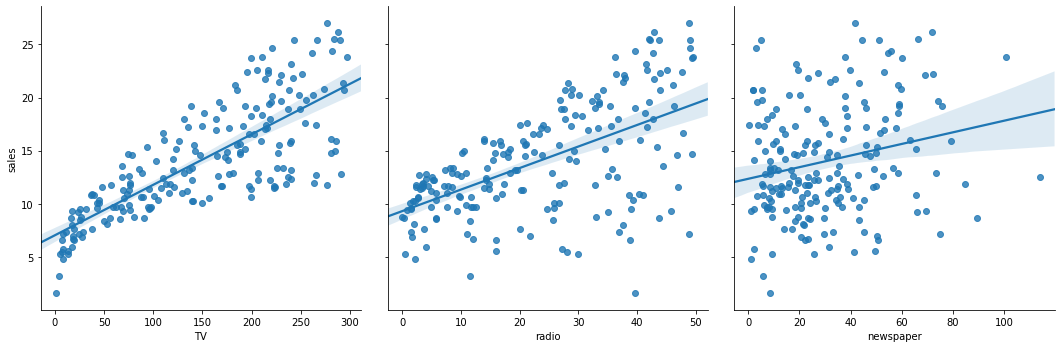

In [0]:
sns.pairplot(data,x_vars=['TV','radio','newspaper'],y_vars='sales',size=5,aspect=1,kind='reg')

**Observation**.   
- Strong relationships between TV ads and sales
- Weak relationship between radio ads and sales
- Very weak to no relationship between Newspaper ads and sales


## Calculating and plotting Heatmap correlation

In [0]:
data.corr()
# only works on numerical continous

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


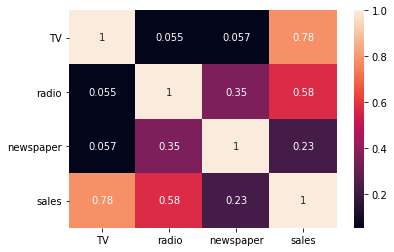

In [0]:
sns.heatmap(data.corr(),annot=True)

**Observations**.  
- The daigonal of the above matrix shows the auto correlation of the variables it is always 1. We can observe that the correlation between TV and Sales is highest i.e 0.78 and then then between sales and radio i.e. 0.576.
- Corelations can vary form -1 to +1 .Closer to +1 means stronger positive correlation and close to -1 means strong negative correlation. Closer to 0 means not vary strongly correlated. Variables with strong correlations are most probably candidates for model building.

# Introduction to Linear Regression.   
**Linear Regression** is a basic and commonly used type of **predictive analysis** .The overall idea of regression is to examine two things:
- Does a set of **predictor variables** do good job in predicting an outcome (dependent) variable?
- Which variables in particular are **significant predictors** of the outcome variable and in what way they do **Impact** the outcome variable ?      
These regression esimates are used to explain the **relationship between one dependent variable and one or more independent variable variables.**The simplest form of the regression equation with one dependent and one independent variable is defined by the formula:
y=B0+B1x   
## What does each term represent ?    
- y is the response
- x is the feature
- B0 is the intercept
- B1 is the coefficient for X.   
Three major uses for **regression analysis** are:    
- determining the **Strength** of predictors,    
    - Typical questions are what is the strength of **relationship** between dose and effect ,sales and marketing spending ,or age and income
- **forcasting** and effect     
  - how much **additional sales income** do i get for each additionl $1000 spent on marketing ?
- **trend** forecasting
   - what will the **price of house** be in 6 months ?
   






## 4.1 Linear Regression Equation With errors in considerations.    
While taking errors into consideration the equation of linear regression.Coefficients are estimated using the **leat square criterion**, which means we are find the line(mathematically) which minimizes the **sum of squared residuals**(or "sum of squared errors").   

### 4.1.1 Asumptions of linear regression.  
1. There shoud be linear and additive relationship between dependent (response) variable and independent (predictor) variable(s).A linear relationship suggests that  a change in response Y due to one unit change in X is constant.An additive relationship suggests that the effect of X on Y is independent of other variables.    
2. There should be no correlation between the residuals(errors) terms.
Absence of the phenomenon is known as Autocorrelation.     
3. The independent variable should not be correlated.Absence of this phenomen is known as mutlicollinearity.    
4. The error terms must have constant variance .This phenomenon is known as homoskedasticity.The presence of non-constant variance is referred to heteroskedasticity.     
5. The error temr must be normally distributed.


### Preparing X and Y using pandas.     
- **Standardization**.    
Standardize features by removing the mean and scalling to unit standard deviation

In [0]:
data.head(3)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3


In [0]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(data)
data1=scaler.transform(data)
dataFrame=pd.DataFrame(data1)
dataFrame.head()

,0,1,2,3
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


In [0]:
dataFrame.columns=['TV','radio','newspaper','sales']
dataFrame.head()
dataFrame.describe()

,TV,radio,newspaper,sales
count,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,1.104672e-16,-4.413137e-16,2.220446e-16,-2.148975e-16
std,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.708823e+00,-1.570868e+00,-1.392646e+00,-2.386924e+00
25%,-8.485295e-01,-8.973206e-01,-8.195504e-01,-7.008497e-01
50%,3.161515e-02,-2.457858e-02,-2.211368e-01,-2.156830e-01
75%,8.381955e-01,8.954299e-01,6.695788e-01,6.489705e-01
max,1.744029e+00,1.778300e+00,3.841171e+00,2.493565e+00


## Steps.   
1. get the data
2. divide into X&Y
3. divide the data into train and test
 


In [0]:
dataFrame.head()
features_cols=['TV','radio','newspaper']
X=dataFrame[features_cols]
print(X)

           TV     radio  newspaper
0    0.969852  0.981522   1.778945
1   -1.197376  1.082808   0.669579
2   -1.516155  1.528463   1.783549
3    0.052050  1.217855   1.286405
4    0.394182 -0.841614   1.281802
..        ...       ...        ...
195 -1.270941 -1.321031  -0.771217
196 -0.617035 -1.240003  -1.033598
197  0.349810 -0.942899  -1.111852
198  1.594565  1.265121   1.640850
199  0.993206 -0.990165  -1.005979

[200 rows x 3 columns]


In [0]:
print(X.shape)

(200, 3)


In [0]:
Y=dataFrame.sales
print(Y.shape)

(200,)


In [0]:
from sklearn.model_selection import train_test_split
def split(X,Y):
  return train_test_split(X,Y ,test_size=0.20,random_state=1)

In [0]:
X_train,X_test,Y_train,Y_test=split(X,Y)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)


(160, 3)
(40, 3)
(160,)


## Linear Regression in scikit-learn.    
To apply machine learining algorithm on your dataset, basically there are 4 steps:     
1.Load the algorithm.    
2.Instantiate and fir the model to training the dataset.     
3.Prediction on the test rest.     
4.Calculating Root Mean Square Error.


In [0]:
# import the model class  or load the algorithm
from sklearn.linear_model import LinearRegression
#  call the model class and create object -Initialization of class
linreg = LinearRegression()
# do the fit by passing (x_train,y_train) and get the trained object
linreg.fit(X_train,Y_train)
# to model  .predict by passing x_test and getting y_pred object
y_pred=linreg.predict(X_test)
# calculate accuracay by comparing (y_pred ,y_test)
print(Y_test.iloc[0])
print(y_pred[0])

RMSE_test = (metrics.mean_squared_error(Y_test, y_pred))

print(RMSE_test)

1.8787000283038928
1.482068424709919
0.07353999839228295
